In [1]:
from statsmodels.tsa.api import VAR
import pandas as pd
import matplotlib.pyplot as plt
from time_series_validation import load_states
import numpy as np

In [2]:
covid_states, state_list = load_states()
new_england = ["MA","ME","NH","VT","RI","CT"]
df = pd.DataFrame(np.array([covid_states[state].beds for state in new_england]).transpose(),
            columns=new_england,
                 index=covid_states["MA"].date)
df_diff = df.copy()
for state in new_england:
    df_diff[state] = df[state].diff(1)
df_diff = df_diff.iloc[1:].copy()
df_diff = df_diff.iloc[df_diff.index < "2021-09-01"].copy()

In [3]:
lag_order = 4 # What does this do?
future = 31
model = VAR(df_diff.values)
results = model.fit(lag_order)
predictions = results.forecast(df_diff.values[-lag_order:], future)

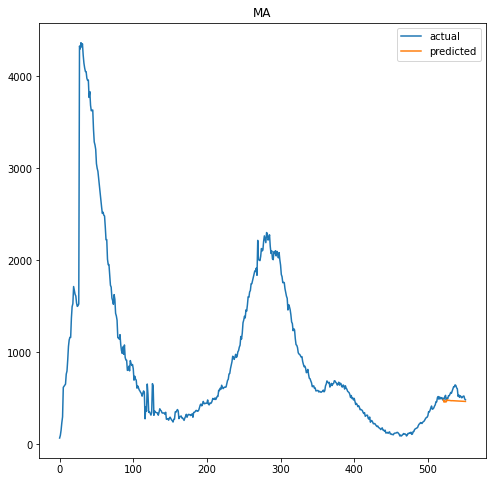

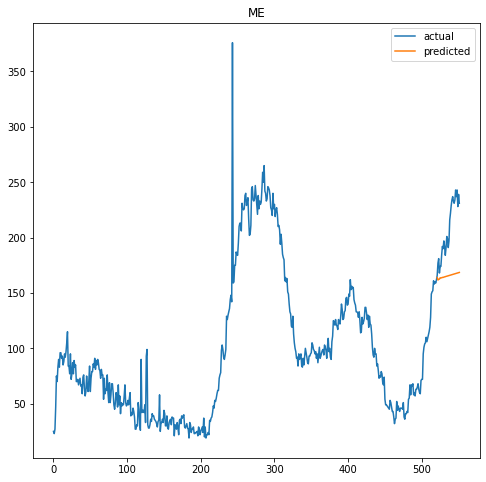

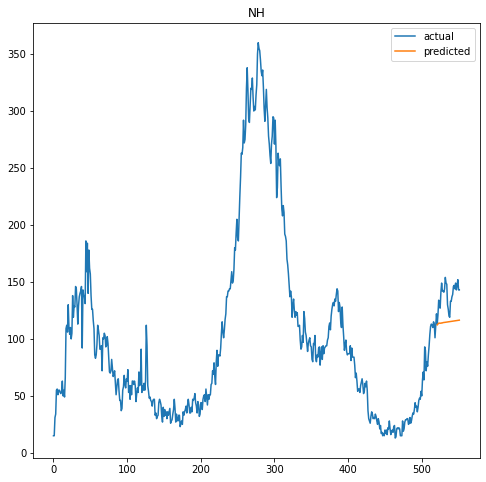

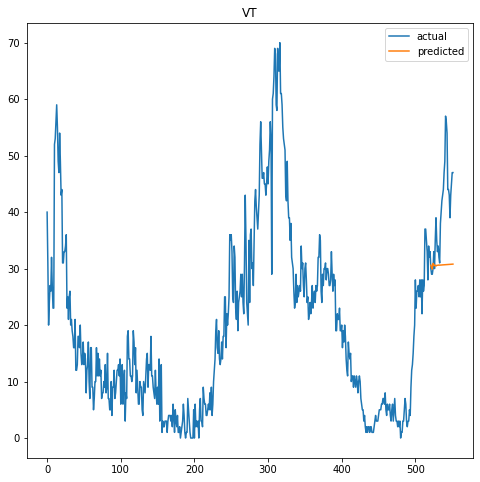

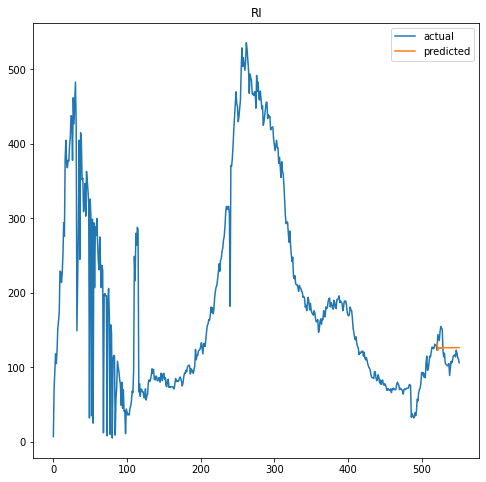

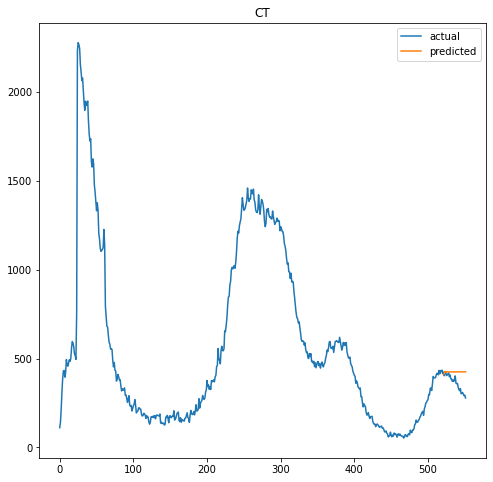

In [4]:
for state_num in range(len(new_england)):
    state_info = df[new_england[state_num]].loc[df.index < "2021-10-01"]

    # Un-difference the sequence
    predicted = np.cumsum(predictions[:,state_num]) + state_info.loc["2021-08-31"]
    
    num_actual = len(state_info)
    plt.figure(figsize=(8,8))
    plt.plot(range(num_actual),state_info, label="actual")
    plt.plot(range(len(df_diff), len(df_diff)+future), predicted, label="predicted")
    plt.legend()
    plt.title(new_england[state_num])
    plt.show()

In [108]:
print(predictions[:,5])

[ 2.10754726  3.12544923 -1.91981983  0.24513756  0.26275373 -0.09937309
  0.11105855  0.04108356  0.02595553  0.0577799   0.0444749   0.04203294
  0.04720055  0.04536062  0.04472703  0.04560716  0.0453458   0.04520992
  0.04536571  0.04532299  0.04529754  0.04532519  0.04531769  0.04531326
  0.04531807  0.04531676  0.04531601  0.04531683  0.0453166   0.04531648
  0.04531662]


In [100]:
predictions

array([[ 1.20398075e+01, -7.44762666e+00, -8.34169044e-01,
         1.98986452e+00,  4.22188814e+00,  2.10754726e+00],
       [-4.58079748e+00,  5.59699569e-01, -4.03492574e-02,
        -1.17170530e-01,  2.01447659e+00,  3.12544923e+00],
       [ 1.39885405e+00,  2.48013639e+00,  2.67418576e-01,
        -2.77100998e-01, -2.52109746e+00, -1.91981983e+00],
       [ 5.93450516e-01, -9.30644162e-01,  2.95396181e-01,
         1.52412864e-01,  7.47577428e-01,  2.45137559e-01],
       [ 3.93413436e-01,  2.35381196e-01,  2.44142901e-01,
         2.30259578e-02,  4.28924338e-01,  2.62753728e-01],
       [ 5.78696287e-01,  6.84197456e-01,  2.62302679e-01,
         7.43191903e-03, -4.10585548e-01, -9.93730945e-02],
       [ 6.48400521e-01,  1.06281927e-01,  2.48654983e-01,
         3.57928813e-02,  1.77296752e-01,  1.11058553e-01],
       [ 5.34005156e-01,  2.70246319e-01,  2.57198509e-01,
         2.53434726e-02,  9.78916958e-02,  4.10835575e-02],
       [ 5.78076819e-01,  3.56538473e-01,  2.585